# ECE 435/535 Computational HW4

### Name: Amir Reza Vazifeh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

##  Least Squares and Ridge Regression

### (1) Housing Dataset:

We will be working with a dataset that records house prices in the suburbs of Boston. The data contains 14 columns, the first 13 columns correspond to various housing features, such as "CRIM" (crime rate per capita), "RM" (average number of rooms), "TAX" (tax rate), etc. A more comprehensive description can be found at https://www.kaggle.com/c/boston-housing. The last column corresponds to the median value of owner-occupied homes in $1000's.

**1-a) Load the housing dataset**    
Form a matrix X with each column a feature, and a vector y of target values.

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

**1-b) Examine the data**    
* Print the dimensions of X and the dimensions of y.
* Determine and print the number of features and the number of sample points.
* Compute and print the sample mean of the house features
* Compute and print the mean target value (mean house price).

In [3]:
# Printing the dimensions of X and the dimensions of y
print("Dimensions of X:", X.shape)
print("Dimensions of y:", y.shape)
print("----------------------------")

# Determine the number of features and the number of sample points
num_samples, num_features = X.shape

# Print the results
print("Number of sample points:", num_samples)
print("Number of features:", num_features)
print("----------------------------")

# Calculate the sample mean for each feature
feature_means = np.mean(X, axis=0)

# Print the sample mean for each feature
for i in range(len(feature_means)):
  print(f"Mean of Feature {i + 1}: {feature_means[i]:.3f}")
print("----------------------------")

# Calculating and printing the mean house price
print(f"Mean House Price : {np.mean(y):.3f}")


Dimensions of X: (506, 13)
Dimensions of y: (506,)
----------------------------
Number of sample points: 506
Number of features: 13
----------------------------
Mean of Feature 1: 3.614
Mean of Feature 2: 11.364
Mean of Feature 3: 11.137
Mean of Feature 4: 0.069
Mean of Feature 5: 0.555
Mean of Feature 6: 6.285
Mean of Feature 7: 68.575
Mean of Feature 8: 3.795
Mean of Feature 9: 9.549
Mean of Feature 10: 408.237
Mean of Feature 11: 18.456
Mean of Feature 12: 356.674
Mean of Feature 13: 12.653
----------------------------
Mean House Price : 22.533


**1-c) Form a training set and a testing set**    
* Select the first 400 samples to be the training set
* The remaining samples (106) form the testing set.

In [4]:
# Select the first 400 samples as the training set
X_train = X[:400, :]
y_train = y[:400]

# Select the remaining samples (106) as the testing set
X_test = X[400:, :]
y_test = y[400:]

**2-a) Write a function solve_ls( )**
* This takes X, y as arguments and returns the solution of: $(X^TX) w = X^T y$.
* Note: X @ Y performs the matrix multiplcation of matrices X and Y
* np.linalg.solve( ) may be useful
* Do not directly compute the inverse of a matrix.

In [5]:
def solve_ls(X, y):

    # Compute X^T * X
    A = X.T @ X

    # Compute X^T * y
    b = X.T @ y

    # Solve for w using np.linalg.solve
    w = np.linalg.solve(A, b)

    return w

**2-b Write a function MSE( )**    
* This takes w, X, y as input and returns the mean squared error that results from predicting target values $\hat y = X w $ when the true value is $y$.

In [6]:
def MSE(w, X, y):

  # Compute the mean squared error
  means_squared_errors = np.mean((y - X @ w) ** 2)

  return means_squared_errors

**3-a) Linear Least Squares Regression**    
* Find a weighting vector w1 to predict house price (in 1000's) from the training feature values.
* Print your answer for the vector w1.
* Compute and print the mean square prediction error on the training data and on the testing data using w1 (print using three decimal places)
* Do the results suggest that the predictor is underfitting or overfitting the training data?
* ANS: overfitting

In [7]:
# LINEAR LEAST SQUARES
# Find weighting vector w1 to predict house price from the training feature values
w1 = solve_ls(X_train, y_train)
print("w1 = ", w1)
print("---------------------")

mse_train_LSR = MSE(w1, X_train, y_train)
mse_test_LSR = MSE(w1, X_test, y_test)

print(f"Mean Squared Error on Training Data: {mse_train_LSR:.3f}")
print(f"Mean Squared Error on Tesing Data: {mse_test_LSR:.3f}")

w1 =  [-2.07803677e-01  4.54598411e-02  3.80540419e-02  1.73671197e+00
 -2.48316331e+00  6.29751631e+00 -3.96993936e-03 -9.44676797e-01
  3.76983123e-01 -1.26846090e-02 -4.50995418e-01  1.11214277e-02
 -4.47627389e-01]
---------------------
Mean Squared Error on Training Data: 23.561
Mean Squared Error on Tesing Data: 35.814


**3-b) Repeat part 3-a using Affine Least Squares Regression**    
* To do this add a column of 1's to X and reform the training and testing data.
* The command np.hstack( ) may be useful.
* Does this method improve the fit to the training data?

 ANS: The Mean Squared Error (MSE) for the training data is indeed lower in Affine Least Squares Regression compared to Least Squares Regression. This suggests an improved fit with Affine Least Squares Regression.

 This improvement can be attributed to the inclusion of a bias term (intercept) in the linear model, a feature absent in the standard linear model. This bias term enables the model to account for data variations often overlooked by a bias-less linear model. The additional flexibility introduced by the Affine model enhances its capacity to capture underlying patterns and relationships in the training data, ultimately leading to a reduction in the training MSE.

* Does it improve generalization?

  ANS: It seems the MSE for testing data in Affine Least Squares Regression is higher than Least Squares Regression, so it may not improve generalization. The addition of a bias term can help the model better fit the training data, but it can also introduce the risk of overfitting if not controlled. The improvement in generalization depends on the specific dataset and whether the model is properly regularized.

* Is this method underfitting or overfitting the data? ANS: overfitting

In [8]:
# AFFINE LEAST SQUARES

# Create a column vector of 1's with the same number of rows as X_train and X_test
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))

# Add the column of 1's to the left of X_train and X_test using hstack
X_train_bias = np.hstack((X_train, ones_train))
X_test_bias = np.hstack((X_test, ones_test))

# Find weighting vector w2 to predict house price from the training feature values
w2 = solve_ls(X_train_bias, y_train)
print("w2 = ", w2)
print("---------------------")

mse_train_affine_LSR = MSE(w2, X_train_bias, y_train)
mse_test_affine_LSR = MSE(w2, X_test_bias, y_test)

print(f"Mean Squared Error on Training Data: {mse_train_affine_LSR:.3f}")
print(f"Mean Squared Error on Tesing Data: {mse_test_affine_LSR:.3f}")


w2 =  [-1.91246374e-01  4.42289967e-02  5.52207977e-02  1.71631351e+00
 -1.49957220e+01  4.88773025e+00  2.60921031e-03 -1.29480799e+00
  4.84787214e-01 -1.54006673e-02 -8.08795026e-01 -1.29230427e-03
 -5.17953791e-01  2.86725996e+01]
---------------------
Mean Squared Error on Training Data: 22.305
Mean Squared Error on Tesing Data: 37.894


**4-a) Z-scoring the Data**    
* Write a function 'get_zscore_data( )' that takes a (training dataset) X as input and returns the mean feature vector X_mu and the standard deviation X_std of the features about the mean. The commands X.mean( ) and X.std( ) may be useful.
* Write a second function 'zscore( )' that takes as input a dataset Z (with the same number of features as X) , X_mu and X_std and returns the Z-scored version of Z using X_mu and X_std. In the case of scalars the output would be (z-x_mu)/x_std.   
* In Python you can use broadcasting to do this operation in 1 short line of code.

In [9]:
# Function to compute mean and SD of features
def get_zscore_data(X):
    X_mu = X.mean(axis=0)  # Mean along each column (feature)
    X_std = X.std(axis=0)  # SD along each column (feature)
    return X_mu, X_std

# Function to Z-score a dataset
def zscore(Z, X_mu, X_std):
    # Use broadcasting to perform Z-scoring in one line
    Z_zscored = (Z - X_mu) / X_std
    return Z_zscored


**4-b) Fitting the Z-scored Data**        
* Compute the mean and standard deviation of the features in the **training data**.
* Use these to z-score the training data and the testing data.
* Compute the mean of the training target values. Subtract this from the training target values.
* Use linear least squares (not affine) to fit "w3" mapping the z-scored training data to the centered training targets.
* The predictor on the training data is now: (X_train_zscore)w3 + y_train_mean
* The predictor on the testing data is now: (X_testing_zscore)w3  + y_train_mean (use training data mean and std to zcore testing data)
* In each case, compute the resulting MSE. Your results using this method should exactly match those in part 3-b.


In [10]:
# Z-SCORING USING THE TRAINING DATA

# Compute the mean and standard deviation of features in the training data
X_mu, X_std = get_zscore_data(X_train)

# Z-score the training and testing data using X_mu and X_std
X_train_zscored = zscore(X_train, X_mu, X_std)
X_test_zscored = zscore(X_test, X_mu, X_std)

# Subtract the mean from the training target values to center them
y_train_mean = np.mean(y_train)
y_train_centered = y_train -  y_train_mean

# Find weighting vector w3 to predict centered house price from the z-scored training feature values
w3 = solve_ls(X_train_zscored, y_train_centered)

# Calculate the predictions on the training data
y_train_predicted_zscored = X_train_zscored @ w3 +  y_train_mean

# Calculate the predictions on the testing data
y_test_predicted_zscored = X_test_zscored @ w3 +  y_train_mean


# Computing the resulting MSE
mse_train_zscored = np.mean((y_train - y_train_predicted_zscored) ** 2)
mse_test_zscored = np.mean((y_test - y_test_predicted_zscored) ** 2)

print(f"Mean Squared Error on Training Data: {mse_train_zscored:.3f}")
print(f"Mean Squared Error on Tesing Data: {mse_test_zscored:.3f}")

Mean Squared Error on Training Data: 22.305
Mean Squared Error on Tesing Data: 37.894


* We can examine the MSE when our prediction is just the overall mean house price of the training data by using w=0. Do this for the training data and testing data and print the results.

In [11]:
# Set w as zero
w_zero = np.zeros(X_train_zscored.shape[1])

# Calculate the predicted values using w=0 for training and testing data
y_train_predicted_zero = X_train_zscored @ w_zero + y_train_mean
y_test_predicted_zero = X_test_zscored @ w_zero + y_train_mean

# Calculate MSE for training and testing data when w=0
mse_train_zero = np.mean((y_train - y_train_predicted_zero)**2)
mse_test_zero = np.mean((y_test - y_test_predicted_zero)**2)

# Print the MSE results
print(f"Mean Squared Error on Training Data: {mse_train_zero:.3f}")
print(f"Mean Squared Error on Tesing Data: {mse_test_zero:.3f}")

Mean Squared Error on Training Data: 83.807
Mean Squared Error on Tesing Data: 102.227


**5-a) Ridge Regression**       
Perform the compuations in 4-b again, using ridge regression in place of least squares. Use a regularization parameter $\lambda$.
* Do the regression computations in a loop for $\lambda$ in 0,10, 20,...600.
* Plot the training MSE and testing MSE versus $\lambda$. Label the axis, provide a title, and use a legend.
* You should notice something special about the testing curve. Does it indicate that selecting a good value of $\lambda$  is important? If so why?
* But we can't use the testing data to select $\lambda$! We need to do this using the training data.

In [12]:
# RIDGE REGRESSION ON Z-SCORED DATA

# Compute the mean and standard deviation of features in the training data
X_mu, X_std = get_zscore_data(X_train)

# Z-score the training and testing data using X_mu and X_std
X_train_zscored = zscore(X_train, X_mu, X_std)
X_test_zscored = zscore(X_test, X_mu, X_std)

# Subtract the mean from the training target values to center them
y_train_mean = np.mean(y_train)
y_train_centered = y_train -  y_train_mean

# Initialize output variables
mse_train_zscored_ridge = []
mse_test_zscored_ridge = []

lambda_array = np.arange(0, 801, 10)

# Find weighting vector w4 to predict centered house price from the z-scored training feature values
for lambda_val in lambda_array:

  # Compute the coefficients using the closed-form solution
  regularization_term = lambda_val * np.identity(num_features)
  A = X_train_zscored.T @ X_train_zscored + regularization_term
  b = X_train_zscored.T @ y_train_centered
  w4 = np.linalg.solve(A, b)

  # Calculate the predictions on the training data
  y_train_predicted_zscored_ridge = X_train_zscored @ w4 +  y_train_mean

  # Calculate the predictions on the testing data
  y_test_predicted_zscored_ridge = X_test_zscored @ w4 +  y_train_mean


  # Computing the resulting MSE
  mse_train_zscored_ridge.append(np.mean((y_train - y_train_predicted_zscored_ridge) ** 2))
  mse_test_zscored_ridge.append(np.mean((y_test - y_test_predicted_zscored_ridge) ** 2) )

# Just to check everything is correct
# print("For lambda = ", lambda_array[0])
# print(f"Mean Squared Error on Training Data: {mse_train_zscored_ridge[0]:.3f}")
# print(f"Mean Squared Error on Tesing Data: {mse_test_zscored_ridge[0]:.3f}")

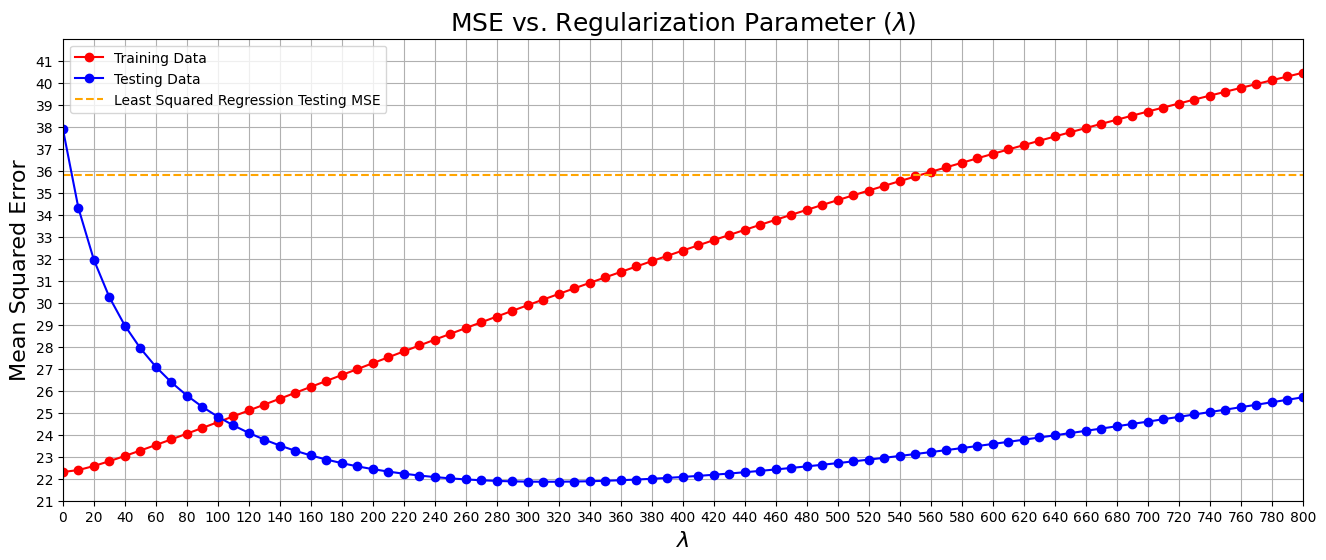

In [13]:
# Now plot the training and testing error vs lambda

# Set the figure size width and height
plt.figure(figsize = (16,6))

plt.plot(lambda_array, mse_train_zscored_ridge, color='red', marker='o', label='Training Data')
plt.plot(lambda_array, mse_test_zscored_ridge, color='blue', marker='o', label='Testing Data')
plt.axhline(mse_test_LSR, color='orange', linestyle='--', label='Least Squared Regression Testing MSE')


# Add labels
plt.xlabel('$\lambda$', fontsize=16)
plt.ylabel('Mean Squared Error', fontsize=16)
plt.title('MSE vs. Regularization Parameter ($\lambda$)', fontsize=18)
plt.grid()

# Set the x-ticks from 0 to 600 with a step of 20
plt.xticks(np.arange(0, 801, 20))

# Set the x-axis limits to 0 and 600
plt.xlim(0, 800)

# Set the y-ticks from 20 to 40 with a step of 1
plt.yticks(range(20, 42, 1))

# Set the y-axis limits to 21 and 39
plt.ylim(21, 42)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

 It's important to observe that as λ grows, the testing mean squared error (MSE) tends to follow a pattern: initially, it decreases, but then it starts to rise. This phenomenon is commonly referred to as the trade-off between bias and variance. When λ is small, the model closely resembles a least squares regression and may exhibit overfitting to the training data. As λ increases, the model simplifies, resulting in a decrease in testing MSE. However, if λ becomes excessively large, the model might underfit the data, leading to an uptick in testing MSE. Consequently, selecting an appropriate λ value is of paramount importance to strike a balance between bias and variance within the model.

**5-b) Validation Data and Hyperparameter Selection**    
To select a value for $\lambda$ (a hyperparamter) we can partition the training set (400 examples) into a smaller training set (300 examples) and a validation set (100 examples), leaving the testing set (106 examples) alone.    


* Execute the partition of the existing training data (before z-scoring)

In [14]:
# Set a random seed for reproducibility (optional)
np.random.seed(0)

# Create an array of indices from 0 to the number of training samples
num_samples = X_train.shape[0]
indices = np.arange(num_samples)

# Shuffle the indices randomly
np.random.shuffle(indices)

# Select the first 100 shuffled indices for validation data
n_validation = 100
validation_indices = indices[:n_validation]

# Use the remaining indices for the smaller training data
smaller_training_indices = indices[n_validation:]

# Create the validation and smaller training datasets
X_validation = X_train[validation_indices]
y_validation = y_train[validation_indices]
X_smaller_train = X_train[smaller_training_indices]
y_smaller_train = y_train[smaller_training_indices]

* Repeat the computations in part 4-b using the new training data. This time compute MSE performance on the training set, the validation set, and the testing set.

In [15]:
# Compute the mean and standard deviation of features in the training data
X_mu, X_std = get_zscore_data(X_smaller_train)

# Z-score the training and testing data using X_mu and X_std
X_train_zscored = zscore(X_smaller_train, X_mu, X_std)
X_validation_zscored = zscore(X_validation, X_mu, X_std)
X_test_zscored = zscore(X_test, X_mu, X_std)

# Subtract the mean from the training target values to center them
y_train_mean = np.mean(y_smaller_train)
y_train_centered = y_smaller_train -  y_train_mean

# Initialize output variables
mse_train_zscored_ridge = []
mse_validation_zscored_ridge = []
mse_test_zscored_ridge = []

lambda_array = np.arange(0, 801, 10)

# Find weighting vector w4 to predict centered house price from the z-scored training feature values
for lambda_val in lambda_array:

  # Compute the coefficients using the closed-form solution
  regularization_term = lambda_val * np.identity(num_features)
  A = X_train_zscored.T @ X_train_zscored + regularization_term
  b = X_train_zscored.T @ y_train_centered
  w5 = np.linalg.solve(A, b)

  # Calculate the predictions on the training data
  y_train_predicted_zscored_ridge = X_train_zscored @ w5 +  y_train_mean

  # Calculate the predictions on the validation data
  y_validation_predicted_zscored_ridge = X_validation_zscored @ w5 +  y_train_mean

  # Calculate the predictions on the testing data
  y_test_predicted_zscored_ridge = X_test_zscored @ w5 +  y_train_mean


  # Computing the resulting MSE
  mse_train_zscored_ridge.append(np.mean((y_smaller_train - y_train_predicted_zscored_ridge) ** 2))
  mse_validation_zscored_ridge.append(np.mean((y_validation - y_validation_predicted_zscored_ridge) ** 2))
  mse_test_zscored_ridge.append(np.mean((y_test - y_test_predicted_zscored_ridge) ** 2))

* Plot the curves of training MSE, validation MSE and testing MSE versus $\lambda.$
* Plot the testing MSE for Least Squares and Affine Least Squares on the same plot as horizontal lines.

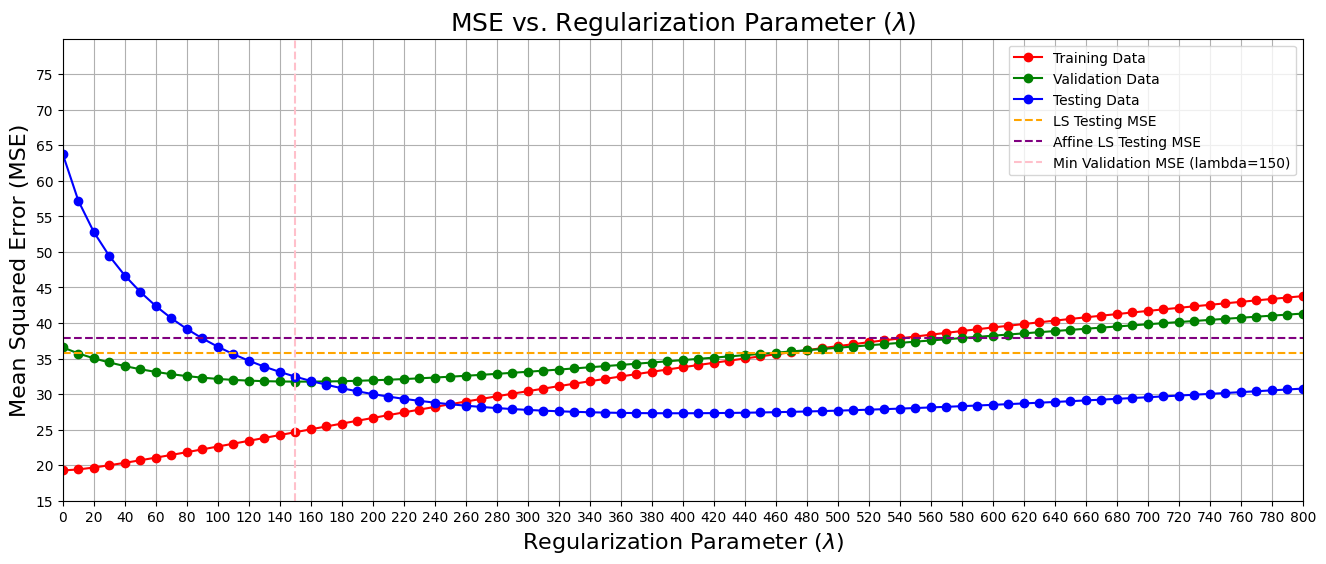

In [16]:
# Now plot the training and testing error vs lambda

# Set the figure size width and height
plt.figure(figsize = (16,6))

plt.plot(lambda_array, mse_train_zscored_ridge, color='red', marker='o', label='Training Data')
plt.plot(lambda_array, mse_validation_zscored_ridge, color='green', marker='o', label='Validation Data')
plt.plot(lambda_array, mse_test_zscored_ridge, color='blue', marker='o', label='Testing Data')
plt.axhline(mse_test_LSR, color='orange', linestyle='--', label='LS Testing MSE')
plt.axhline(mse_test_affine_LSR, color='purple', linestyle='--', label='Affine LS Testing MSE')

# Find the index of the minimum value
best_lambda_index = np.argmin(mse_validation_zscored_ridge)

# Add vertical line at the minimum testing MSE with the corresponding lambda
plt.axvline(lambda_array[best_lambda_index], color='pink', linestyle='--', label=f'Min Validation MSE (lambda={lambda_array[best_lambda_index]})')


# Add labels
plt.xlabel('Regularization Parameter ($\lambda$)', fontsize=16)
plt.ylabel('Mean Squared Error (MSE)', fontsize=16)
plt.title('MSE vs. Regularization Parameter ($\lambda$)', fontsize=18)
plt.grid()

# Set the x-ticks from 0 to 600 with a step of 20
plt.xticks(np.arange(0, 801, 20))

# Set the x-axis limits to 0 and 600
plt.xlim(0, 800)

# Set the y-ticks from 20 to 40 with a step of 1
plt.yticks(range(15, 80, 5))

# Set the y-axis limits to 21 and 39
plt.ylim(15, 80)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

* Since the validation data is training data you can use the results for validation performace to select a value for $\lambda.$ What is a good choice for $\lambda$ based on the validation MSE?

 Based on the provided figure, it appears that selecting a value of λ equal to 150 could be a suitable choice. This selection is based on the observation that λ = 150 corresponds to the point where the Mean Squared Error (MSE) on the validation set is minimized. Selecting λ in this manner can help optimize the model's performance in terms of generalization to new data.

* Using this value for  𝜆  what is the expected testing performance? Is this performance better that the least squares (linear and affine) results in 3-a and 3-b?

 As evident from the figure above, the Mean Square Error (MSE) for the testing data when λ = 150 is notably lower than the results obtained using Least Squares (both linear and affine) as presented in sections 3-a and 3-b. This suggests that Ridge Regression with λ equal to 150 has resulted in improved predictive performance on the testing dataset compared to the simpler linear models.